<h3>Loading Data</h3>

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Load our dataset
df = pd.read_csv('Salaries.csv')

In [125]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)

Number of rows:  148654
Number of columns:  13


In [126]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [127]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

<h4>before cleaning</h4>

In [128]:
print(df['Benefits'].mean())
df.describe()

25007.893150829852


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [129]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

<h3>Cleaning Data</h3>

In [130]:
# df['Status']=df['Status'].fillna('')
# df['Notes']=df['Notes'].fillna('')
df=df.drop(['Status', 'Notes'], axis=1)

df['Benefits']=df['Benefits'].fillna(0)
df['BasePay']=df['BasePay'].fillna(df['BasePay'].mean())
df['OvertimePay']=df['OvertimePay'].fillna(df['OvertimePay'].mean())
df['OtherPay']=df['OtherPay'].fillna(df['OtherPay'].mean())


<h4>after cleaning</h4>

In [131]:

print(df['Benefits'].mean())

df.describe()

18924.23283887417


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66325.448840,5066.059886,3648.767297,18924.232839,74768.321972,93692.554811,2012.522643
std,42912.857795,42676.946745,11454.226449,8056.493470,17165.279495,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,33847.017500,0.000000,0.000000,0.000000,36168.995000,44065.650000,2012.000000
50%,74327.500000,65092.190000,0.000000,811.350000,23214.020000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94605.740000,4658.667500,4235.907500,33468.980000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [132]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [133]:
mean_salary = df['TotalPay'].mean()
print('Mean Salary: ', mean_salary)

Mean Salary:  74768.32197169267


In [134]:
median_salary = df['TotalPay'].median()
print('Median Salary: ', median_salary)

Median Salary:  71426.60999999999


In [135]:
mode_salary = df['TotalPay'].mode()
print('Mode Salary: ', mode_salary)

Mode Salary:  0    0.0
Name: TotalPay, dtype: float64


In [136]:
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
salary_range = max_salary - min_salary
print('Minimum Salary: ', min_salary)
print('Maximum Salary: ', max_salary)
print('Salary Range: ', salary_range)

Minimum Salary:  -618.13
Maximum Salary:  567595.43
Salary Range:  568213.56


In [137]:
std_dev = df['TotalPay'].std()
print('Standard Deviation: ', std_dev)

Standard Deviation:  50517.005273949944


In [138]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

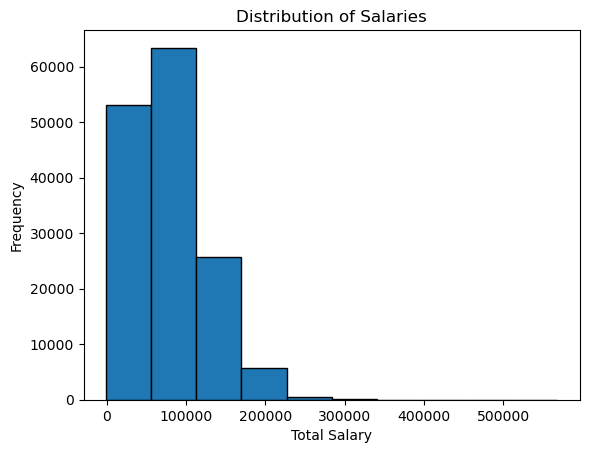

In [139]:
plt.hist(df['TotalPay'], edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Total Salary')
plt.ylabel('Frequency')
plt.show()

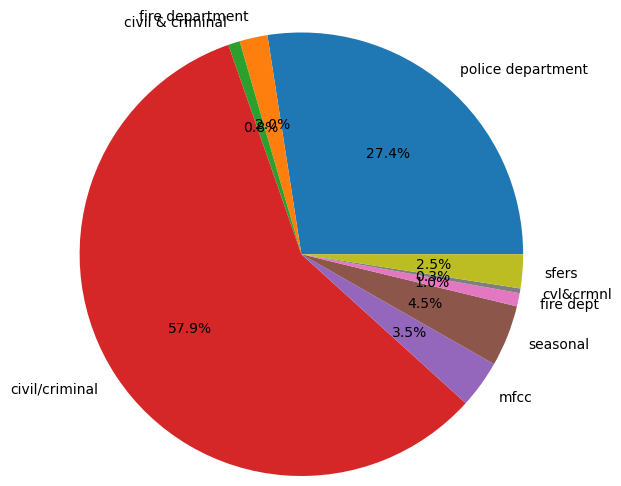

In [140]:
import re

departments = {}

for title in df['JobTitle']:
    match = re.search(r'\((.*?)\)', title)
    if match:
        match = match.group(1).lower()
        if(match in departments):
            departments[match]+=1
        else:
            departments[match]=1

plt.pie(departments.values(), labels=departments.keys(),autopct='%1.1f%%',radius=1.5)
plt.show()

<h3>Grouped Analysis</h3>

In [141]:
grouped = df.groupby('JobTitle')
agg_grouped= grouped['TotalPay'].agg(['mean', 'min', 'max'])

agg_grouped

,mean,min,max
JobTitle,,,
ACCOUNT CLERK,44035.664337,614.00,60838.20
ACCOUNTANT,47429.268000,1148.40,65392.01
ACCOUNTANT INTERN,29031.742917,2981.53,58799.53
"ACPO,JuvP, Juv Prob (SFERS)",62290.780000,62290.78,62290.78
ACUPUNCTURIST,67594.400000,67594.40,67594.40
...,...,...,...
X-RAY LABORATORY AIDE,52705.880385,5343.69,85077.40
X-Ray Laboratory Aide,50823.942700,1007.00,99812.97
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000,53632.87,53632.87


In [142]:
grouped = df.groupby(['Year','JobTitle'])
agg_grouped = grouped['TotalPay'].agg(['mean', 'min', 'max'])
agg_grouped

mean        min        max
Year JobTitle                                                           
2011 ACCOUNT CLERK                    44035.664337     614.00   60838.20
     ACCOUNTANT                       47429.268000    1148.40   65392.01
     ACCOUNTANT INTERN                29031.742917    2981.53   58799.53
     ACUPUNCTURIST                    67594.400000   67594.40   67594.40
     ADMINISTRATIVE ANALYST           63954.867527    2388.24   79754.03
...                                            ...        ...        ...
2014 Wire Rope Cable Maint Sprv      190575.900000  190575.90  190575.90
     Worker's Comp Supervisor 1       56689.446667      56.64  108144.01
     Worker's Compensation Adjuster   70636.455385    1837.39  106050.66
     X-Ray Laboratory Aide            51211.566857   11341.85   99812.97
     Youth Comm Advisor               36465.910000   36465.91   36465.91

[4137 rows x 3 columns]

<h3>Correlation Analysis</h3>

Correlation coefficient between TotalPay and OvertimePay: 0.5048439903996068
Correlation coefficient between TotalPay and BasePay: 0.9505142922626444


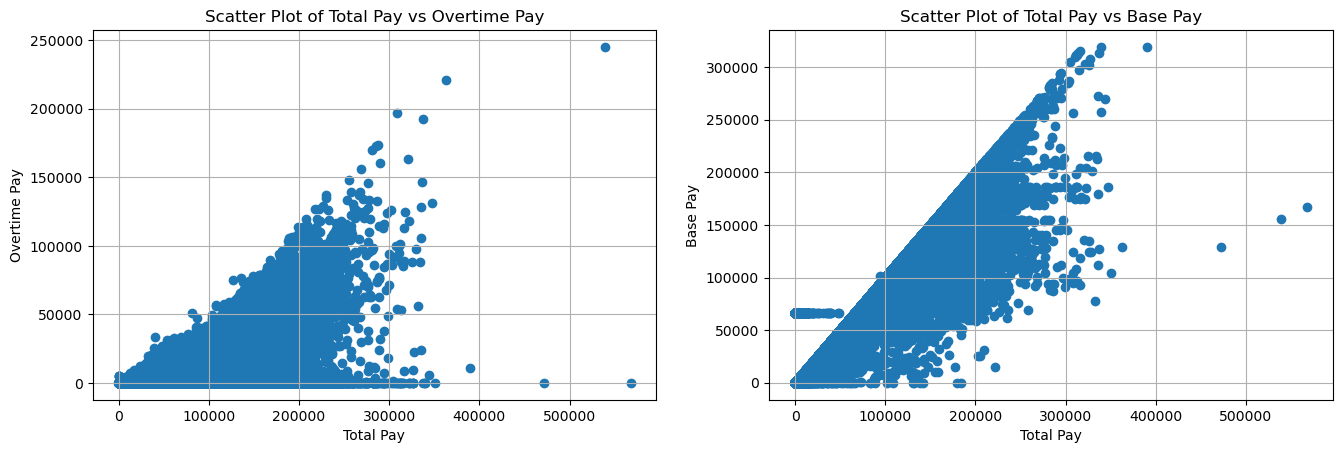

In [143]:
correlation = df['TotalPay'].corr(df['OvertimePay'])
correlation1 = df['TotalPay'].corr(df['BasePay'])

print(f"Correlation coefficient between TotalPay and OvertimePay: {correlation}")
print(f"Correlation coefficient between TotalPay and BasePay: {correlation1}")

fig, axs = plt.subplots(1,2)
axs[0].scatter(df['TotalPay'], df['OvertimePay'])
axs[1].scatter(df['TotalPay'], df['BasePay'])
fig.set_figwidth(16)

axs[0].set_xlabel("Total Pay")
axs[0].set_ylabel("Overtime Pay")
axs[0].set_title("Scatter Plot of Total Pay vs Overtime Pay")

axs[1].set_xlabel("Total Pay")
axs[1].set_ylabel("Base Pay")
axs[1].set_title("Scatter Plot of Total Pay vs Base Pay")

axs[0].grid(True)
axs[1].grid(True)

plt.show()


<h1>Summary of Insights</h1>
    <ul>
        <li>The dataset contains 148654 rows and 13 columns.</li>
        <li>The dataset contains columns with data type
            <ol>
                <li>Id                   :   int64</li>
                <li>EmployeeName         :  object</li>
                <li>JobTitle             :  object</li>
                <li>BasePay              : float64</li>
                <li>OvertimePay          : float64</li>
                <li>OtherPay             : float64</li>
                <li>Benefits             : float64</li>
                <li>TotalPay             : float64</li>
                <li>TotalPayBenefits     : float64</li>
                <li>Year                 :   int64</li>
                <li>Notes                : float64</li>
                <li>Agency               :  object</li>
                <li>Status               : float64</li>
            </ol>
        </li>
        <li>The missing values in dataset is
            <ol>
                <li>BasePay             :     609</li>
                <li>OvertimePay         :       4</li>
                <li>OtherPay            :       4</li>
                <li>Benefits            :   36163</li>
                <li>Notes               :  148654</li>
                <li>Status              :  148654</li>
            </ol>
        </li>
        <li>The Descriptive Statistics
            <ol>
                <li>The min            :      -618.13</li>
                <li>The max            :    567595.43</li>
                <li>The range          :    568213.56</li>
                <li>The mean           : 74768.321972</li>
                <li>The std            : 50517.005274</li>
                <li>The median         :71426.6099999</li>
            </ol>
        </li>
        <li>I dropped the Status,Notes because they useless and all values are missing</li>
        <li>I used the mean to fill missing values to unchanged the min max mean and range,
        <br>this approach used when the data is approximately normally distributed and a few values is missing</li>
    </ul>
